In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
connection = MongoClient()

db = connection.movie_dataset
crew = db.crew

# Trova i costumisti e quanti sono

In [2]:
costume_crew = pd.DataFrame(crew.find({"department": "Costume & Make-Up"}))
costume_crew

,_id,credit_id,department,person_id,movie_id
0,5f510ba1a9e826701e40c2cd,52fe4292c3a36847f80291bb,Costume & Make-Up,8527.0,949.0
1,5f510ba1a9e826701e40c2d6,564717adc3a3682611002c07,Costume & Make-Up,1535950.0,949.0
2,5f510ba1a9e826701e40c2dd,564717949251413e7f002a36,Costume & Make-Up,1535949.0,949.0
3,5f510ba1a9e826701e40c2de,564717f19251413adb002c49,Costume & Make-Up,8870.0,949.0
4,5f510ba1a9e826701e40c2df,5647180a9251413adb002c52,Costume & Make-Up,16551.0,949.0
...,...,...,...,...,...
30845,5f510cada9e826701e505fae,56ff7440c3a3686e9e0014cd,Costume & Make-Up,1599742.0,390959.0
30846,5f510cada9e826701e505faf,56ff745a925141677d001538,Costume & Make-Up,1599742.0,390959.0
30847,5f510cada9e826701e505fb9,5823404cc3a368330b00cb6e,Costume & Make-Up,5493.0,390959.0
30848,5f510cada9e826701e505fd1,5894ae1992514142800081fc,Costume & Make-Up,1749861.0,439050.0


In [3]:
costume_crew['person_id'].nunique()

12434

# Trova l'ID del genere 'History'

In [4]:
genres = db.genres
pd.DataFrame(genres.find({'name': 'History'}))

,_id,name
0,36,History


# Recupera gli ID dei migliori film di genere storico

In [5]:
metadata = db.metadata
metadata_dataframe = pd.DataFrame(metadata.find({'genres': 36})).astype({'_id': 'int32'})
metadata_dataframe = metadata_dataframe[metadata_dataframe['vote_count'] >= 10]
metadata_dataframe = metadata_dataframe.sort_values('vote_average', ascending=False)
metadata_dataframe

,_id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
269,31217,False,85473.0,0,"[10752, 18, 36]",ja,人間の條件 第１部純愛篇／第２部激怒篇,The Human Condition is a Japanese epic film tr...,2.75699,/5wF521QDBJplvbQq3lxWY3uYupU.jpg,...,1959-01-15,0.0,208.0,"[ja, zh]",Released,The Immortal Story,The Human Condition I: No Greater Love,False,8.5,42.0
307,34528,False,85473.0,0,"[10752, 18, 36]",ja,人間の條件 第３部望郷篇／第４部戦雲篇,"Kaji, having lost his exemption from military ...",1.91477,/svdKfhT9WLfrC8zgOWmZt4mgyK0.jpg,...,1959-11-20,0.0,181.0,"[ja, zh, ru]",Released,First Sequel of an Anti-War Masterpiece,The Human Condition II: Road to Eternity,False,8.5,31.0
309,34530,False,85473.0,0,"[10752, 18, 36]",ja,人間の條件 完結篇,"The Japanese forces having been shattered, Kaj...",2.32728,/svdKfhT9WLfrC8zgOWmZt4mgyK0.jpg,...,1961-01-28,0.0,191.0,"[ja, zh, ru]",Released,Love is the Condition for Being Human,The Human Condition III: A Soldier's Prayer,False,8.4,28.0
302,803,False,NaN,0,"[36, 99, 10752]",fr,Nuit et brouillard,The documentary film from French director Resn...,11.1447,/2iWYQia8enOai7QEO3TvenleD7r.jpg,...,1955-01-01,0.0,32.0,[fr],Released,NaN,Night and Fog,False,8.3,97.0
1152,215740,False,NaN,0,"[18, 36]",de,Die andere Heimat - Chronik einer Sehnsucht,"Follow-up to the TV trilogy ""Heimat"", this tim...",1.824098,/jxuhSQ7glNSAn5zYXV0fVNyQlji.jpg,...,2013-10-03,0.0,225.0,[de],Released,NaN,Home from Home – Chronicle of a Vision,False,8.3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,19495,False,NaN,25000000,"[28, 36, 10752]",en,Nomad,The Nomad is a historical epic set in 18th-cen...,8.76278,/jSYw5pbtfF22UIEBwuPnsbUawrZ.jpg,...,2005-07-17,0.0,112.0,"[en, kk, ro]",Released,Courage know no limit,Nomad: The Warrior,False,4.3,17.0
794,2911,False,NaN,0,"[28, 80, 36, 10752]",en,The Last Drop,Different factions in WWII-era Holland race to...,1.63136,/gPdQSFgllfBJ7b7RMKSlBuZIGZt.jpg,...,2005-05-23,0.0,103.0,[en],Released,What better time for a heist than in the fog o...,The Last Drop,False,4.2,12.0
526,14977,False,NaN,0,"[28, 12, 18, 36, 27]",en,Red Sands,"During a mission in the Middle East, a group o...",3.15925,/85Es9wILCehlEo95PgOkSDqygSM.jpg,...,2009-02-24,0.0,89.0,"[en, pl]",Released,NaN,Red Sands,False,4.0,32.0
1035,128767,False,NaN,0,"[36, 12]",el,Ο Θεός Αγαπάει το Χαβιάρι,"The true-life, stranger-than-fiction tale of e...",1.73165,/9jZhUIiQpsTnCajIWSSbzYlp9TO.jpg,...,2012-10-11,0.0,99.0,"[ru, el, en]",Released,NaN,God Loves Caviar,False,3.9,11.0


In [6]:
id_list = metadata_dataframe['_id']
id_list

269      31217
307      34528
309      34530
302        803
1152    215740
         ...  
462      19495
794       2911
526      14977
1035    128767
507      34867
Name: _id, Length: 823, dtype: int32

# Trova i costumisti che hanno partecipato a più film storici

In [7]:
best_costume_crew = costume_crew[costume_crew['movie_id'].isin(id_list)]
costume_count = best_costume_crew.groupby('person_id').count().sort_values('movie_id', ascending=False)
costume_count = costume_count['_id']
costume_count

person_id
26175.0      6
9247.0       6
4061.0       5
461.0        4
17166.0      4
            ..
1303052.0    1
1304201.0    1
1304298.0    1
1304433.0    1
1890086.0    1
Name: _id, Length: 1234, dtype: int64

# Grafico con valutazioni dei film (Y) per i 10 più prolifici costumisti (X)

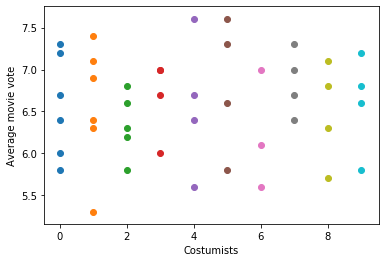

In [8]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(10):
    person = costume_count.index[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.xlabel('Costumists')
plt.ylabel('Average movie vote')
plt.show()

# Voti (Y) di tutti i film dei costumisti (X) che hanno partecipato ai 20 migliori e peggiori film

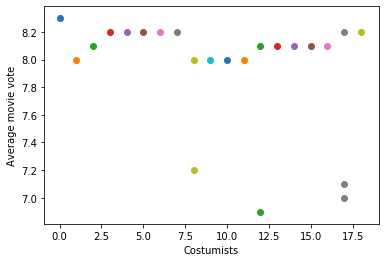

In [9]:
best_hfilms = metadata_dataframe.head(20)
best_hcostume = costume_crew[costume_crew['movie_id'].isin(best_hfilms['_id'])]
best_hcostume_count = best_hcostume['person_id'].astype('int32')

for i in range(best_hcostume_count.shape[0]):
    person = best_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.xlabel('Costumists')
plt.ylabel('Average movie vote')
plt.show()

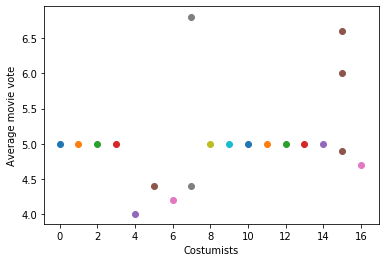

In [10]:
worst_hfilms = metadata_dataframe.tail(20)
worst_hcostume = costume_crew[costume_crew['movie_id'].isin(worst_hfilms['_id'])]
worst_hcostume_count = worst_hcostume['person_id'].astype('int32')

for i in range(worst_hcostume_count.shape[0]):
    person = worst_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.xlabel('Costumists')
plt.ylabel('Average movie vote')
plt.show()

# Come prima, ma considerando solo i costumisti che hanno partecipato ad almeno 3 film

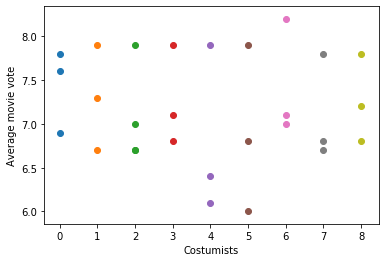

In [11]:
best_hfilms = metadata_dataframe.head(50)
many_films_crew = costume_crew[costume_crew['person_id'].isin(costume_count[costume_count >= 3].index)]
best_hcostume = many_films_crew[many_films_crew['movie_id'].isin(best_hfilms['_id'])]
best_hcostume_count = best_hcostume['person_id'].astype('int32')

for i in range(best_hcostume_count.shape[0]):
    person = best_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.xlabel('Costumists')
plt.ylabel('Average movie vote')
plt.show()

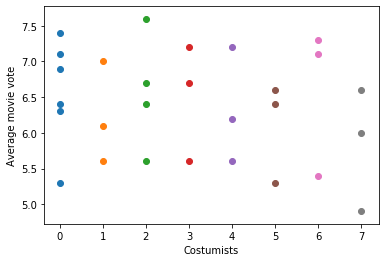

In [12]:
worst_hfilms = metadata_dataframe.tail(55)
worst_hcostume = many_films_crew[many_films_crew['movie_id'].isin(worst_hfilms['_id'])]
worst_hcostume_count = worst_hcostume['person_id'].astype('int32')

for i in range(worst_hcostume_count.shape[0]):
    person = worst_hcostume_count.iloc[i]
    participated_movies = costume_crew[costume_crew['person_id'] == person]
    participated_movies = participated_movies['movie_id']
    resulting_dataframe = metadata_dataframe[metadata_dataframe['_id'].isin(participated_movies.astype('int32'))]
    average_vote = resulting_dataframe['vote_average']
    plt.scatter(np.full(average_vote.shape, i, dtype=int), average_vote)

plt.xlabel('Costumists')
plt.ylabel('Average movie vote')
plt.show()

In [13]:
connection.close()